1.작업형 제1유형

01 주어진 데이터 세트는 소방서별 신고접수시간, 출발시간, 도착시간이다. 신고접수 후 출발시간까지를 대응시간, 출발
시간에서 도착시간까지를 출동시간이라고 할 때 소방서별 출동시간 평균이 가장 큰 소방서의 출동시간 평균을 구하시오.
(단, 반올림하여 소수점 둘째 자리까지 계산한다.)

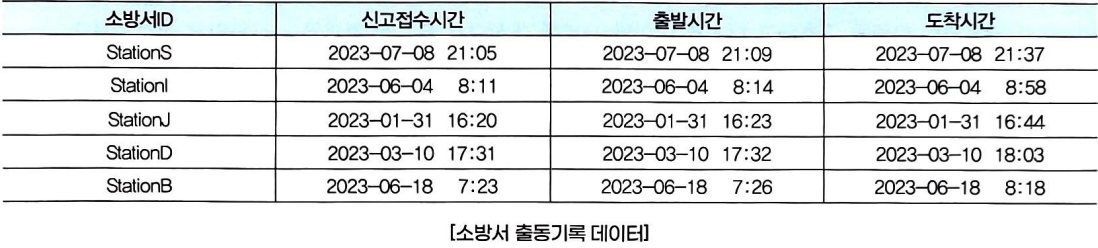

In [34]:
import pandas as pd
file = '/content/06.01.01-Fire Station Data.csv'

# cp949 문자셋(확장 완성형)은 EUC-KR에 생긴 문제를 해결하기 위해 만들어진 것이다.
df = pd.read_csv(file, encoding='cp949')
# print(df.head())

df1 = df.copy()

# 신고접수시간, 출발시간, 도착시간에서 대응시간, 출동시간을 구하기 위해서는
# 신고접수시간, 출발시간, 도착시간의 데이터를 타입을 날짜타입으로 변환한다.
# 문자열 타입을 날짜 타입으로 변경하기
df1['신고접수시간'] = pd.to_datetime(df1['신고접수시간'])
df1['출발시간'] = pd.to_datetime(df1['출발시간'])
df1['도착시간'] = pd.to_datetime(df1['도착시간'])
# print(df1.info())

# 변환된 컬럼을 이용하여 대응시간, 출동시간을 구한다.
df1['대응시간'] = df1['출발시간'] - df1['신고접수시간']  # 대응시간
df1['출동시간'] = df1['도착시간'] - df1['출발시간']  # 출동시간

# print(df1)
# 대응시간, 출동시간을 초로 변환하기
df1['대응시간'] = df1['대응시간'].dt.total_seconds()
df1['출동시간'] = df1['출동시간'].dt.total_seconds()
# print(df1)

# groupby로 소방서별 출동시간 평균 구하기
dg = df1.groupby('소방서ID')[['출동시간']].mean()
# reset_index()는 기존 행 인덱스를 제거하고 인덱스를 데이터 열에 추가
dg = dg.reset_index()
# print(type(dg))
# print(dg)

# 출동시간이 가장 긴 소방서ID를 구하기 위해 내림차순 정렬하여 구하도록 한다.
dg = dg.sort_values('출동시간', ascending=False)
# print(dg)

# 출동시간이 가장 긴 소방서ID 찾기
# iloc : 행 번호를 기준으로 행 데이터를 읽어온다.
# result = dg.iloc[0]['소방서ID']
# result = dg.iloc[0, 0]
dg = dg.reset_index()
# loc : 인덱스 기준으로 행 데이터를 읽어온다.
result = dg.loc[0, '출동시간']
result = round(result, 2)
print(result)





2276.25
